In [75]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [76]:
from pandas.plotting import scatter_matrix

In [77]:
wholesale = pd.read_csv('Wholesale customers data.csv')

In [78]:
wholesale.shape

(440, 8)

In [79]:
wholesale.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [80]:
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [81]:
print(wholesale.isnull().sum(axis=0).tolist())#no missing values

[0, 0, 0, 0, 0, 0, 0, 0]


In [82]:
df = wholesale.drop(wholesale.columns[[0,1]], axis=1)#the region column was dropped because it has lot of others
#we are trying to cluster based on the products being bought hereby dropping region and channel

In [83]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [84]:
df.shape

(440, 6)

In [85]:
df.describe#summary statistics

<bound method NDFrame.describe of      Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]>

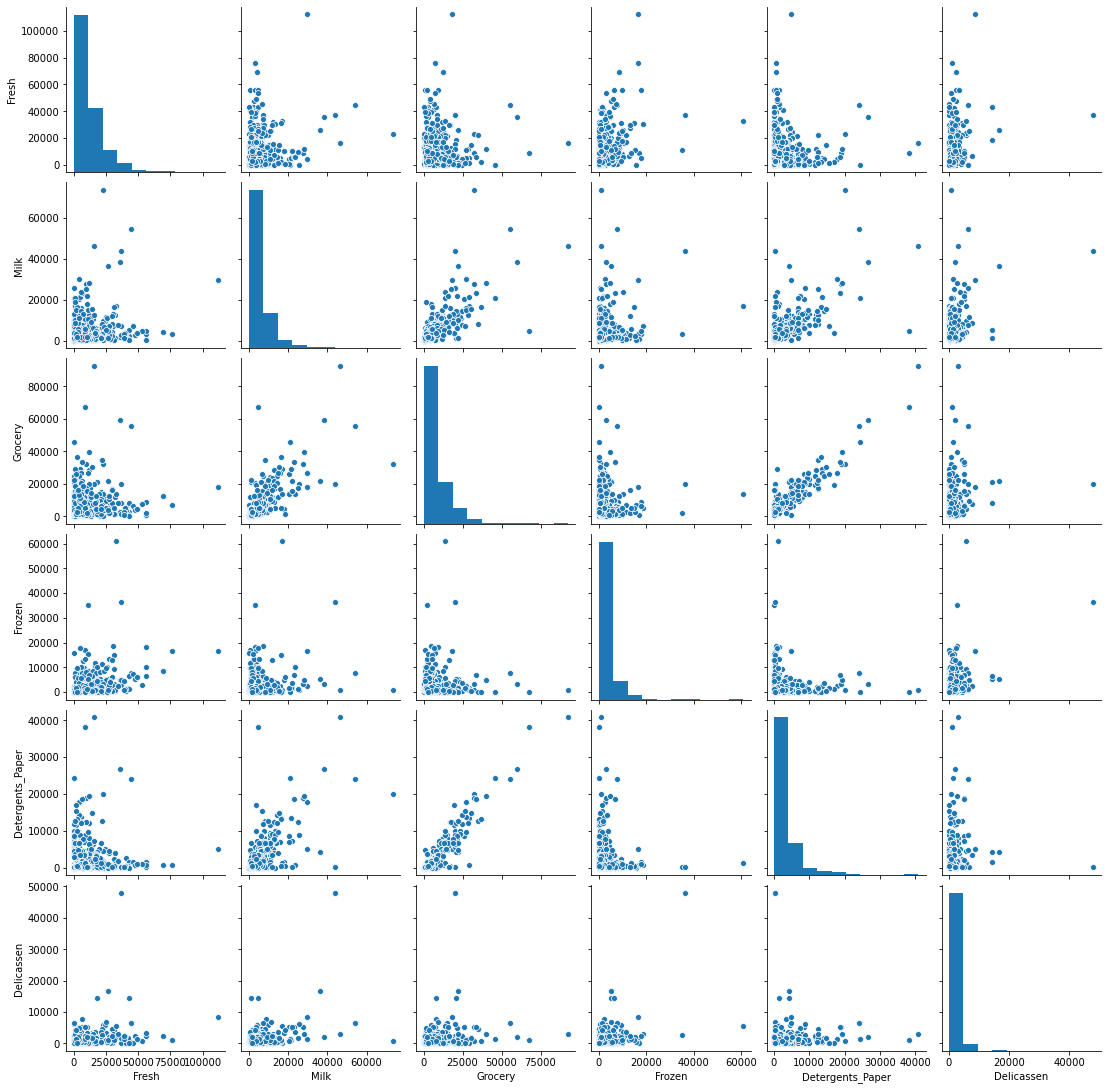

In [86]:
sns.pairplot(df)#skewed data

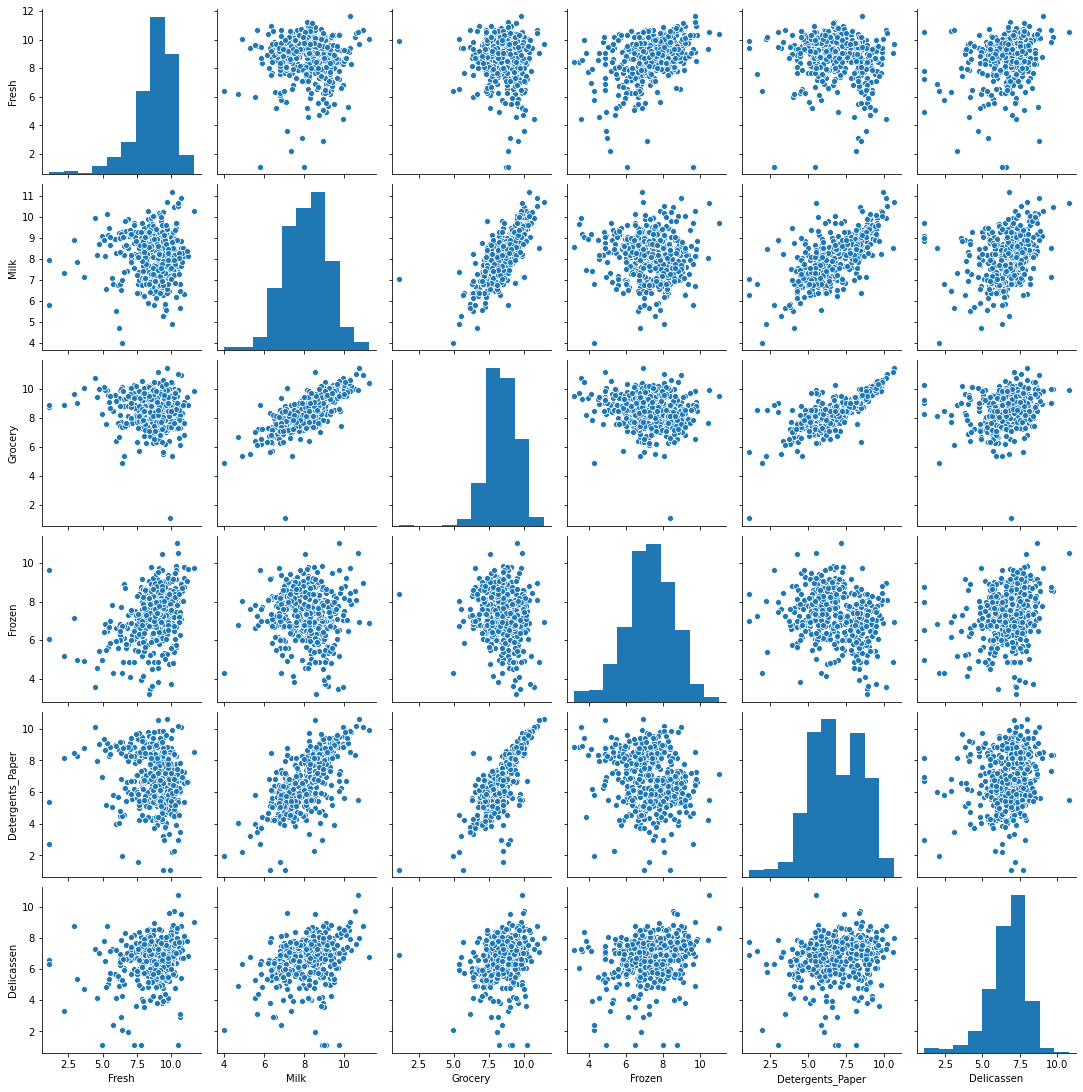

In [87]:
#use of natural logarithm to scale data
df_log = np.log(df.copy())
sns.pairplot(df_log)                                                               

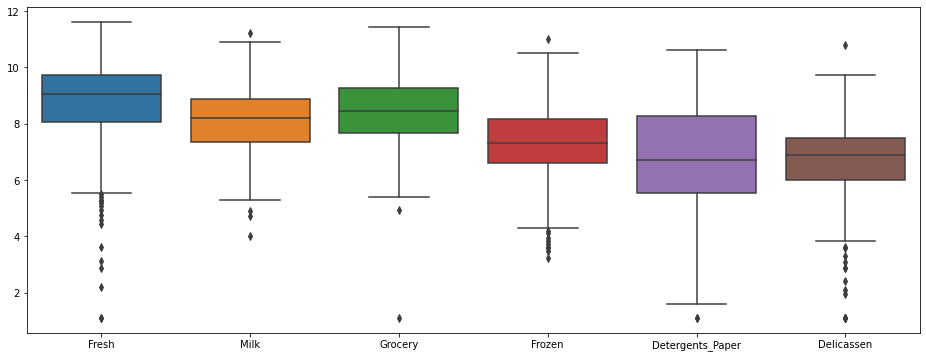

In [88]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_log)

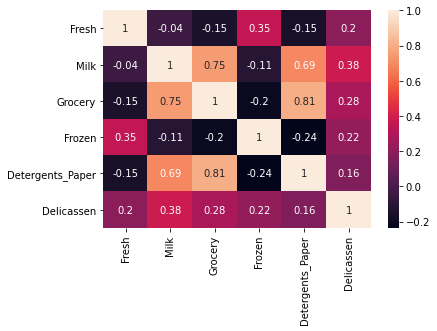

In [91]:
corrMatrix = clean_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [92]:
def TukeyMethod(df,column):
    q1 = np.percentile(df[column],25)
    q3 = np.percentile(df[column],75)
    step = (q3-q1)*1.5
    iqr = (df[column] >= q1-step) & (df[column] <= q3+step)
    (print("Outlier Identified for columns - {}".format(column)))
    display(df.loc[~iqr].head())
    return df.loc[iqr]

for i,columns in enumerate(df_log.columns):
    clean_df=TukeyMethod(df_log,columns)
    
print("Tukey's outlier removal Method")   

Outlier Identified for columns - Fresh


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897


Outlier Identified for columns - Milk


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Outlier Identified for columns - Grocery


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Outlier Identified for columns - Frozen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617


Outlier Identified for columns - Detergents_Paper


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Outlier Identified for columns - Delicassen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612


Tukey's outlier removal Method


In [93]:
clean_df.shape

(426, 6)

In [125]:
x_train = clean_df.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=3, random_state=540)
kmeans = kmeans.fit(x_train)

print("The clusters are: ", kmeans.labels_)

print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [2 2 2 1 2 2 2 2 0 2 2 1 2 2 2 1 0 1 2 2 2 1 2 2 2 0 1 1 2 1 2 1 1 2 1 0 2
 2 0 1 2 2 0 0 0 2 2 2 2 2 1 0 2 0 1 2 2 0 1 0 0 2 2 2 1 0 2 2 1 1 2 1 2 2
 1 1 2 1 0 1 0 2 1 2 2 2 2 1 2 1 1 2 1 0 0 0 1 1 1 2 0 2 2 1 1 0 2 0 1 2 1
 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 0 1 1 1 1 1 1 1
 1 0 0 1 0 0 0 1 1 2 2 2 2 0 1 1 0 0 0 0 1 0 2 1 1 1 2 2 0 1 1 2 0 1 1 1 0
 1 1 2 0 1 1 2 2 2 1 0 1 0 0 0 1 2 1 2 0 2 0 1 0 1 1 0 1 1 1 1 2 1 1 1 2 0
 1 1 0 1 1 1 2 2 1 1 2 2 0 1 1 1 1 1 2 1 2 2 1 1 2 2 2 1 1 1 2 0 2 0 1 2 1
 1 1 1 1 1 1 2 1 1 2 1 2 2 1 2 1 1 1 1 1 1 0 2 0 1 2 2 1 2 0 0 0 0 0 2 1 1
 0 1 1 0 1 2 0 1 0 1 2 1 1 1 2 1 2 1 1 1 1 1 2 1 0 1 2 1 1 1 1 0 0 0 1 0 2
 2 1 2 1 0 1 0 2 1 1 0 2 1 1 1 1 0 1 2 1 1 1 1 2 1 1 2 1 1 2 1 1 0 1 1 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 2 2 2 2 1 0 2 1 2 0 0 0 2 0
 2 1 2 2 1 2 2 1 1 1 2 1 1 2 2 1 2 1 1]
The Inertia is:  2398.6859622649113


In [94]:
x_train = clean_df.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(x_train)

print("The clusters are: ", kmeans.labels_)

print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [2 1 1 4 4 2 2 1 2 1 1 2 1 1 1 2 3 4 1 2 1 0 4 1 1 2 0 0 1 4 1 2 2 4 2 3 4
 1 3 4 4 1 2 3 2 1 1 1 1 1 4 2 2 3 4 2 1 3 0 2 2 1 1 1 4 3 1 4 2 4 1 4 4 1
 0 4 1 0 2 2 3 1 4 2 1 1 4 0 4 0 4 1 4 2 3 3 0 0 0 1 1 1 4 2 0 3 1 3 0 1 4
 4 0 0 0 4 4 4 4 0 0 2 4 4 4 1 4 4 0 2 0 0 0 1 2 2 4 0 4 2 1 0 2 0 0 0 0 0
 2 3 1 4 1 3 1 0 4 1 2 1 1 2 0 0 3 3 3 3 0 3 4 0 0 4 2 1 3 0 0 1 3 0 0 0 3
 0 4 4 1 4 2 1 1 4 0 3 0 2 2 1 4 1 0 1 1 1 3 0 3 0 0 2 0 4 0 2 1 0 2 4 4 2
 2 4 2 0 0 0 4 4 4 4 2 1 1 0 0 2 4 0 1 4 2 1 0 2 4 4 4 2 0 0 2 3 1 3 4 1 0
 0 0 0 4 2 0 4 4 4 1 0 1 4 4 4 2 4 0 2 0 4 1 2 2 4 2 1 0 1 1 3 3 3 3 1 4 0
 3 4 4 3 0 2 1 0 2 2 1 0 4 4 2 4 4 0 0 4 4 4 1 4 1 4 1 0 4 0 4 3 1 3 0 3 1
 1 2 1 0 1 0 3 4 0 0 3 4 0 4 0 0 2 0 1 0 0 0 0 4 4 4 1 0 0 1 0 0 2 4 4 1 0
 4 0 0 4 0 0 0 0 0 4 0 0 1 0 0 0 0 4 0 2 4 0 4 1 2 1 2 0 3 4 4 1 1 2 3 2 3
 1 2 2 2 4 1 4 2 0 2 4 2 0 2 4 4 1 0 2]
The Inertia is:  1912.3139725899994


In [97]:
number_of_clusters = range(2,16) 
inertia = []


for f in number_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(x_train)
    k = kmeans.inertia_
    inertia.append(k)
    print("The inertia for :", f, "Clusters is:", k)

The inertia for : 2 Clusters is: 2804.27165480975
The inertia for : 3 Clusters is: 2398.805710367436
The inertia for : 4 Clusters is: 2114.163435634514
The inertia for : 5 Clusters is: 1912.1682453592518
The inertia for : 6 Clusters is: 1754.5593311906418
The inertia for : 7 Clusters is: 1650.776447943709
The inertia for : 8 Clusters is: 1565.1485880372245
The inertia for : 9 Clusters is: 1489.5822327387716
The inertia for : 10 Clusters is: 1409.2419777978287
The inertia for : 11 Clusters is: 1338.9115650725864
The inertia for : 12 Clusters is: 1267.3329534009151
The inertia for : 13 Clusters is: 1223.9781427208645
The inertia for : 14 Clusters is: 1192.4398040191277
The inertia for : 15 Clusters is: 1145.1131287858977


Text(0.5, 1.0, 'Inertia Plot per k')

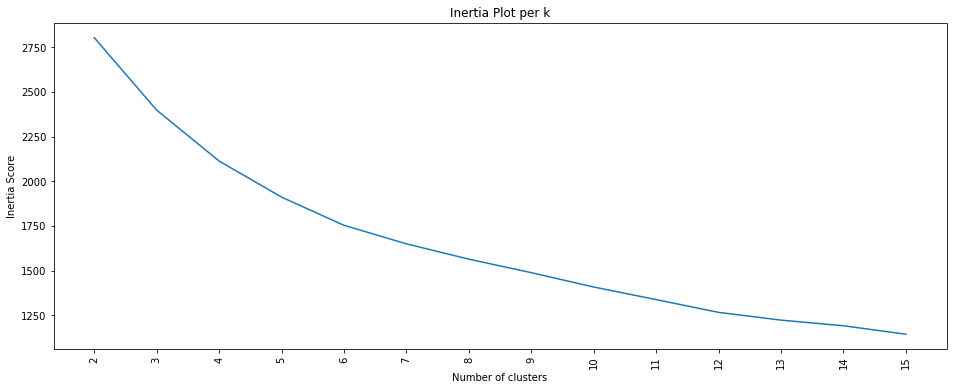

In [98]:
# Creating the scree plot for Intertia - elbow method
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(number_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(number_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [126]:
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(x_train)


kmeans.labels_

k_predict = kmeans.predict(x_train)

unique, counts = np.unique(k_predict, return_counts=True)
counts = counts.reshape(1,5)

clustercount = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
clustercount

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,57,77,93,44,155


In [103]:
kmeans.labels_

array([4, 1, 1, 0, 0, 4, 4, 1, 4, 1, 1, 4, 1, 1, 1, 4, 3, 0, 1, 4, 4, 2,
       0, 1, 1, 4, 2, 2, 1, 4, 1, 4, 4, 0, 4, 3, 0, 1, 3, 0, 0, 1, 4, 3,
       4, 1, 1, 1, 1, 1, 0, 4, 4, 3, 0, 4, 1, 3, 2, 4, 4, 1, 1, 1, 0, 3,
       1, 0, 4, 0, 1, 0, 0, 1, 2, 0, 1, 2, 4, 4, 3, 1, 0, 4, 1, 1, 0, 2,
       0, 2, 0, 1, 0, 4, 3, 3, 2, 2, 2, 1, 1, 1, 0, 4, 2, 3, 1, 3, 2, 1,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 4, 0, 0, 0, 1, 0, 0, 2, 4, 2, 2,
       2, 1, 4, 4, 0, 2, 0, 4, 1, 2, 4, 2, 2, 2, 2, 2, 4, 3, 1, 0, 1, 3,
       1, 2, 0, 1, 4, 1, 1, 4, 2, 2, 3, 3, 3, 3, 2, 3, 0, 2, 2, 0, 4, 1,
       3, 2, 2, 1, 3, 2, 2, 2, 3, 2, 0, 0, 1, 0, 4, 1, 1, 0, 2, 3, 2, 4,
       4, 1, 0, 1, 2, 1, 1, 1, 3, 2, 3, 2, 2, 4, 2, 0, 2, 4, 1, 2, 4, 0,
       0, 4, 4, 0, 4, 2, 2, 2, 0, 0, 0, 0, 4, 1, 1, 2, 2, 4, 0, 2, 1, 0,
       4, 1, 2, 4, 0, 0, 0, 4, 2, 2, 4, 3, 1, 3, 0, 1, 2, 2, 2, 2, 0, 4,
       2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 4, 0, 2, 4, 2, 0, 1, 4, 4, 0, 4, 1,
       2, 1, 1, 3, 3, 3, 3, 1, 0, 2, 3, 0, 0, 3, 2,

In [104]:
predictions

array([4, 1, 1, 0, 0, 4, 4, 1, 4, 1, 1, 4, 1, 1, 1, 4, 3, 0, 1, 4, 4, 2,
       0, 1, 1, 4, 2, 2, 1, 4, 1, 4, 4, 0, 4, 3, 0, 1, 3, 0, 0, 1, 4, 3,
       4, 1, 1, 1, 1, 1, 0, 4, 4, 3, 0, 4, 1, 3, 2, 4, 4, 1, 1, 1, 0, 3,
       1, 0, 4, 0, 1, 0, 0, 1, 2, 0, 1, 2, 4, 4, 3, 1, 0, 4, 1, 1, 0, 2,
       0, 2, 0, 1, 0, 4, 3, 3, 2, 2, 2, 1, 1, 1, 0, 4, 2, 3, 1, 3, 2, 1,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 4, 0, 0, 0, 1, 0, 0, 2, 4, 2, 2,
       2, 1, 4, 4, 0, 2, 0, 4, 1, 2, 4, 2, 2, 2, 2, 2, 4, 3, 1, 0, 1, 3,
       1, 2, 0, 1, 4, 1, 1, 4, 2, 2, 3, 3, 3, 3, 2, 3, 0, 2, 2, 0, 4, 1,
       3, 2, 2, 1, 3, 2, 2, 2, 3, 2, 0, 0, 1, 0, 4, 1, 1, 0, 2, 3, 2, 4,
       4, 1, 0, 1, 2, 1, 1, 1, 3, 2, 3, 2, 2, 4, 2, 0, 2, 4, 1, 2, 4, 0,
       0, 4, 4, 0, 4, 2, 2, 2, 0, 0, 0, 0, 4, 1, 1, 2, 2, 4, 0, 2, 1, 0,
       4, 1, 2, 4, 0, 0, 0, 4, 2, 2, 4, 3, 1, 3, 0, 1, 2, 2, 2, 2, 0, 4,
       2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 4, 0, 2, 4, 2, 0, 1, 4, 4, 0, 4, 1,
       2, 1, 1, 3, 3, 3, 3, 1, 0, 2, 3, 0, 0, 3, 2,

In [105]:
clean_df.shape

(426, 6)

Explained variance ratio (first two components): [0.43454495 0.27595536]


<Figure size 432x288 with 0 Axes>

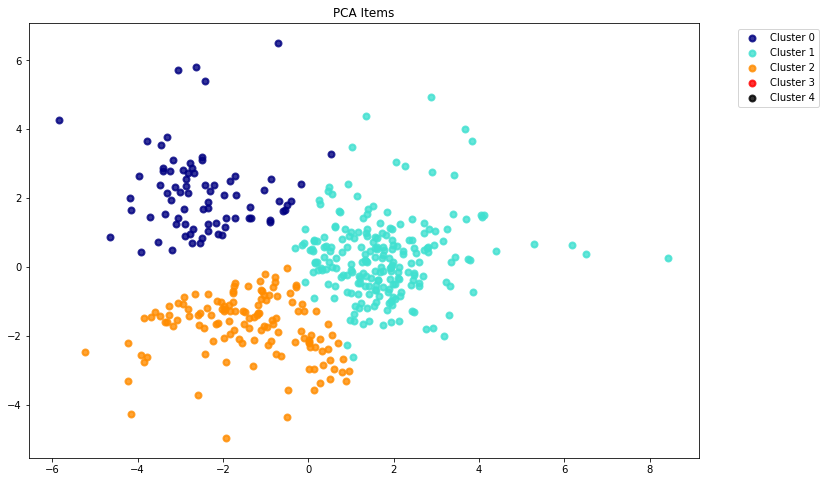

In [129]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = x_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
fitdata = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(fitdata[y_num == i, 0], fitdata[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA Items')
plt.show()


In [130]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters = 3, random_state=2)
kmeans = kmeans.fit(x_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(x_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2
0,214,77,135


Explained variance ratio (first two components): [0.43454495 0.27595536]


<Figure size 432x288 with 0 Axes>

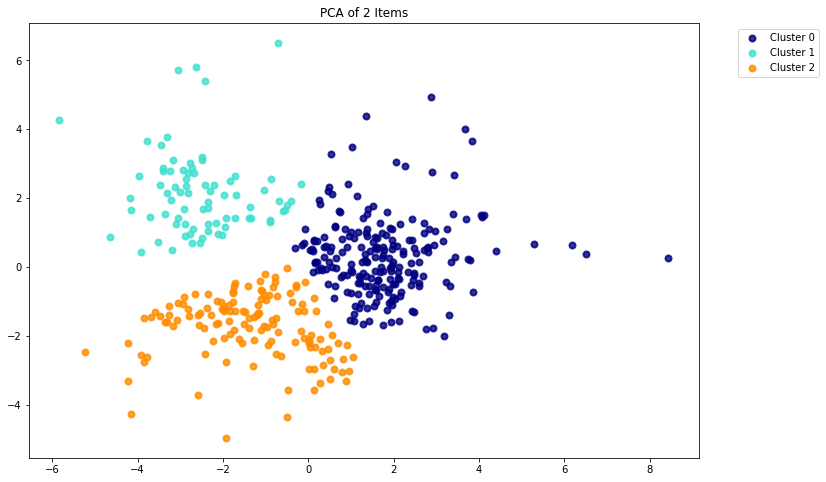

In [131]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = x_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=2, random_state = 453)
fit_data = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(fit_data[y_num == i, 0], fit_data[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [109]:
Hotel = wholesale[wholesale['Channel']==1].drop(['Channel'],axis=1)
Retail = wholesale[wholesale['Channel']==2].drop(['Channel'],axis=1)

[78944577292.64761, 42646784094.57916, 31771920693.00036, 26104621897.222412, 21052823019.235867, 18119507647.048645, 15802548826.833208, 14193783607.626451, 12736613084.457687]


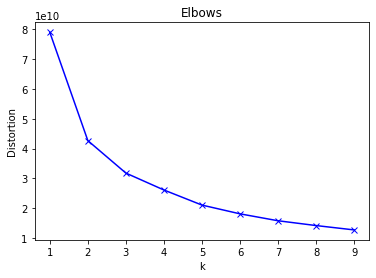

In [110]:
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(Hotel)
    distortions.append(model.inertia_)
print(distortions)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbows')
plt.show()

In [111]:
kmeans = KMeans(n_clusters=3,max_iter=1000,random_state=42)
kmeans.fit(Hotel)
predict = kmeans.predict(Hotel)
kpoints = kmeans.cluster_centers_
print(kpoints)

[[2.49509804e+00 6.41728431e+03 3.08570098e+03 3.60684314e+03
  2.77967157e+03 8.43093137e+02 9.74161765e+02]
 [2.55555556e+00 2.43542963e+04 3.31839506e+03 4.09029630e+03
  4.29865432e+03 5.83197531e+02 1.60504938e+03]
 [2.46153846e+00 5.64533077e+04 1.00262308e+04 8.73900000e+03
  1.55180769e+04 1.25823077e+03 7.17053846e+03]]


In [112]:
from sklearn import decomposition
#dfHoReCa=pd.DataFrame(StandardScaler().fit_transform(dfHoReCa))
pca = decomposition.PCA(n_components=3)

### Numpy 1.19.5 produces non-convergance random error on first pass, so retry if necessary ###
while True: 
    try: 
        Hotel_Res_Cafe = pca.fit_transform(Hotel) 
        break 
    except: 
        continue
print("Explained Variance ratio:",pca.explained_variance_ratio_)
Hotel_Res_Cafe.shape

Explained Variance ratio: [0.74810135 0.13996661 0.06806867]


(298, 3)

In [113]:
import plotly.express as px
fig = px.scatter_3d(x=Hotel_Res_Cafe[:, 0], y=Hotel_Res_Cafe[:, 1], z=Hotel_Res_Cafe[:, 2], color=predict,width=1200, height=900)
fig.show()

In [114]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(clean_df)
labels = k_means.labels_
print(labels)

[2 2 2 1 2 2 2 2 0 2 2 1 2 2 2 1 0 1 2 2 2 1 2 2 2 0 1 1 2 1 2 1 1 2 1 0 2
 2 0 1 2 2 0 0 0 2 2 2 2 2 1 0 2 0 1 2 2 0 1 0 0 2 2 2 1 0 2 2 1 1 2 1 2 2
 1 1 2 1 0 1 0 2 1 2 2 2 2 1 2 1 1 2 1 0 0 0 1 1 1 2 0 2 2 1 1 0 2 0 1 2 1
 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 0 1 1 1 1 1 1 1
 1 0 0 1 0 0 0 1 1 2 2 2 2 0 1 1 0 0 0 0 1 0 2 1 1 1 2 2 0 1 1 2 0 1 1 1 0
 1 1 2 0 1 1 2 2 2 1 0 1 0 0 0 1 2 1 2 0 2 0 1 0 1 1 0 1 1 1 1 2 1 1 1 2 0
 1 1 0 1 1 1 2 2 1 1 2 2 0 1 1 1 1 1 2 1 2 2 1 1 2 2 2 1 1 1 2 0 2 0 1 2 1
 1 1 1 1 1 1 2 1 1 2 1 2 2 1 2 1 1 1 1 1 1 0 2 0 1 2 2 1 2 0 0 0 0 0 2 1 1
 0 1 1 0 1 2 0 1 0 1 2 1 1 1 2 1 2 1 1 1 1 1 2 1 0 1 2 1 1 1 1 0 0 0 1 0 2
 2 1 2 1 0 1 0 2 1 1 0 2 1 1 1 1 0 1 2 1 1 1 1 2 1 1 2 1 1 2 1 1 0 1 1 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 2 2 2 2 1 0 2 1 2 0 0 0 2 0
 2 1 2 2 1 2 2 1 1 1 2 1 1 2 2 1 2 1 1]


In [122]:
clean_df["Cluster"] = labels
clean_df.head(5)

<ipython-input-122-25d9910ce49f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clus_km,Cluster
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,2,2
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,2,2
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,2,2
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,1,1
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,2,2


No handles with labels found to put in legend.


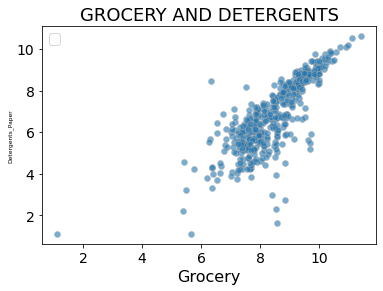

In [123]:
sns.scatterplot('Grocery', 'Detergents_Paper', 
               data = clean_df,
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('GROCERY AND DETERGENTS', 
          fontsize = 18)
plt.xlabel('Grocery', 
           fontsize = 16)
plt.ylabel('Detergents_Paper', 
           fontsize = 6)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('grocery.png')
plt.show()

No handles with labels found to put in legend.


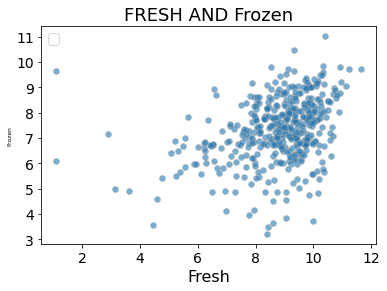

In [133]:
sns.scatterplot('Fresh', 'Frozen', 
               data = clean_df, 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('FRESH AND Frozen', 
          fontsize = 18)
plt.xlabel('Fresh', 
           fontsize = 16)
plt.ylabel('Frozen', 
           fontsize = 6)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('grocery.png')
plt.show()